In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#   for filename in filenames:
#       print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_dir = "/kaggle/input/yoga-pose-image-classification-dataset/dataset"

In [3]:
import os
folders = os.listdir(data_dir)
print(folders)

['virabhadrasana i', 'janu sirsasana', 'chaturanga dandasana', 'ashtanga namaskara', 'camatkarasana', 'gomukhasana', 'makarasana', 'padmasana', 'savasana', 'vajrasana', 'dhanurasana', 'vrischikasana', 'bhujangasana', 'marjaryasana', 'astavakrasana', 'kapotasana', 'utthita parsvakonasana', 'pincha mayurasana', 'vriksasana', 'utthita hasta padangustasana', 'baddha konasana', 'virabhadrasana ii', 'adho mukha vriksasana', 'ustrasana', 'malasana', 'urdhva dhanurasana', 'purvottanasana', 'eka pada koundinyanasana ii', 'yoganidrasana', 'utkatasana', 'dandasana', 'bakasana', 'ardha uttanasana', 'tittibhasana', 'supta padangusthasana', 'vasisthasana', 'parivrtta parsvakonasana', 'bharadvajasana i', 'makara adho mukha svanasana', 'tolasana', 'supta virasana', 'utthita ashwa sanchalanasana', 'utthita trikonasana', 'matsyasana', 'supta baddha konasana', 'parsvottanasana', 'salabhasana', 'ananda balasana', 'urdhva prasarita eka padasana', 'salamba sarvangasana', 'eka pada koundinyanasana i', 'prasa

In [4]:
items = os.listdir(data_dir)
folders = [item for item in items if os.path.isdir(os.path.join(data_dir, item))]
num_folders = len(folders)  #counting the number of folders here

print("Number of folders in the dataset:", num_folders)

Number of folders in the dataset: 107


In [5]:

folder_counts = {}   #initilizing dir
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)    #path to current folder
    files = os.listdir(folder_path)  #list of files in folder
    num_images = len(files)   #counting the number of images to the file

    # Store the count along with the folder name in the dictionary
    folder_counts[folder_name] = num_images


for folder, count in folder_counts.items():    #printing count for each folder
    print(f"Folder '{folder}' has {count} images.")


Folder 'virabhadrasana i' has 55 images.
Folder 'janu sirsasana' has 48 images.
Folder 'chaturanga dandasana' has 90 images.
Folder 'ashtanga namaskara' has 34 images.
Folder 'camatkarasana' has 54 images.
Folder 'gomukhasana' has 72 images.
Folder 'makarasana' has 57 images.
Folder 'padmasana' has 68 images.
Folder 'savasana' has 57 images.
Folder 'vajrasana' has 54 images.
Folder 'dhanurasana' has 46 images.
Folder 'vrischikasana' has 51 images.
Folder 'bhujangasana' has 73 images.
Folder 'marjaryasana' has 46 images.
Folder 'astavakrasana' has 72 images.
Folder 'kapotasana' has 57 images.
Folder 'utthita parsvakonasana' has 63 images.
Folder 'pincha mayurasana' has 35 images.
Folder 'vriksasana' has 62 images.
Folder 'utthita hasta padangustasana' has 59 images.
Folder 'baddha konasana' has 70 images.
Folder 'virabhadrasana ii' has 56 images.
Folder 'adho mukha vriksasana' has 59 images.
Folder 'ustrasana' has 87 images.
Folder 'malasana' has 68 images.
Folder 'urdhva dhanurasana' h

In [6]:
total_count = 0
# Iterate through each folder
for folder_name in os.listdir(data_dir):
    # Construct the path to the current folder
    folder_path = os.path.join(data_dir, folder_name)

    # List all the files in the current folder
    files = os.listdir(folder_path)

    # Count the number of files (images) in the folder and add to the total count
    total_count += len(files)

# Print the total number of images in the dataset
print("Total number of images in the dataset:", total_count)

Total number of images in the dataset: 5994


In [7]:

from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


In [8]:
 for file_name in files:
        
        file_path = os.path.join(folder_path, file_name)
        
        # Open the image file using PIL
        image = Image.open(file_path)
        
        # Check if the image has transparency (alpha) channel
        if 'A' in image.mode:
            print(f"Image '{file_name}' in folder '{folder_name}' has transparency (alpha) channel.")
        else:
            print(f"Image '{file_name}' in folder '{folder_name}' does not have transparency (alpha) channel.")

Image '16-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '40-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '20-1.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '25-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '1-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '0-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '48-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '93-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '32-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '30-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '41-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '82-0.png' in folder 'durvasasana' does not have transparency

In [9]:
resized_images = []    #initizling list to store resize images
labels = []


desired_size = (255, 255)    #converting size of each image into 255*255 pixels


for folder_name in folders:    #going through eacg folder

    folder_path = os.path.join(data_dir, folder_name)
    
    
    files = os.listdir(folder_path)
    
    
    for file_name in files:   #going through each file
        
        file_path = os.path.join(folder_path, file_name)
        
        
        image = Image.open(file_path)   #opening images using PIL(Python Imaging Library)
        
        
        image = image.convert('RGB')    #all imaging are not in RGB format , so firstly converting it into RGB , then only we can able to resize the img
                                         
        
        
        resized_image = image.resize(desired_size)   #resizing image
        
        
        image_array = np.array(resized_image)   #converting images into numpy array
        
        
        resized_images.append(image_array)   #appending resize images into resize image list
        
        # Appending the label to the labels list
        labels.append(folder_name)

# Converting lists to numpy arrays
images = np.array(resized_images)
labels = np.array(labels)


print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Shape of images array: (5994, 255, 255, 3)
Shape of labels array: (5994,)


In [10]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

transformations = transforms.Compose([transforms.Resize((256, 256)), 
                                      transforms.RandomCrop(224),
                                     transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = ImageFolder(data_dir, transform = transformations)

In [11]:
import torchvision.datasets as datasets

# Assuming data_dir is the directory where your dataset is located
dataset = datasets.ImageFolder(root=data_dir)

# Accessing the class_to_idx attribute of the dataset
class_to_idx_mapping = dataset.class_to_idx


In [12]:
dataset.class_to_idx    

{'adho mukha svanasana': 0,
 'adho mukha vriksasana': 1,
 'agnistambhasana': 2,
 'ananda balasana': 3,
 'anantasana': 4,
 'anjaneyasana': 5,
 'ardha bhekasana': 6,
 'ardha chandrasana': 7,
 'ardha matsyendrasana': 8,
 'ardha pincha mayurasana': 9,
 'ardha uttanasana': 10,
 'ashtanga namaskara': 11,
 'astavakrasana': 12,
 'baddha konasana': 13,
 'bakasana': 14,
 'balasana': 15,
 'bhairavasana': 16,
 'bharadvajasana i': 17,
 'bhekasana': 18,
 'bhujangasana': 19,
 'bhujapidasana': 20,
 'bitilasana': 21,
 'camatkarasana': 22,
 'chakravakasana': 23,
 'chaturanga dandasana': 24,
 'dandasana': 25,
 'dhanurasana': 26,
 'durvasasana': 27,
 'dwi pada viparita dandasana': 28,
 'eka pada koundinyanasana i': 29,
 'eka pada koundinyanasana ii': 30,
 'eka pada rajakapotasana': 31,
 'eka pada rajakapotasana ii': 32,
 'ganda bherundasana': 33,
 'garbha pindasana': 34,
 'garudasana': 35,
 'gomukhasana': 36,
 'halasana': 37,
 'hanumanasana': 38,
 'janu sirsasana': 39,
 'kapotasana': 40,
 'krounchasana': 

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (4795, 255, 255, 3) (4795,)
Validation set: (599, 255, 255, 3) (599,)
Testing set: (600, 255, 255, 3) (600,)


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

2024-04-08 07:41:50.672232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 07:41:50.672350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 07:41:50.874914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_folders, activation='softmax')  # Output layer with number of classes equal to number of folders
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Normalize pixel values to the range [0, 1]
X_train_normalized = X_train / 255.0
X_val_normalized = X_val / 255.0
X_test_normalized = X_test / 255.0

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Now, y_train_encoded, y_val_encoded, and y_test_encoded should contain numeric labels


In [20]:
history = model.fit(X_train_normalized, y_train_encoded, epochs=10, validation_data=(X_val_normalized, y_val_encoded))

Epoch 1/10
  3/150 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.0174 - loss: 4.8917     

I0000 00:00:1712562144.359521     643 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 39s 173ms/step - accuracy: 0.0164 - loss: 4.6768 - val_accuracy: 0.1736 - val_loss: 3.9123
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.3171 - loss: 3.1443 - val_accuracy: 0.3539 - val_loss: 2.8123
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.6698 - loss: 1.3384 - val_accuracy: 0.3923 - val_loss: 2.9230
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9048 - loss: 0.4589 - val_accuracy: 0.3856 - val_loss: 3.3673
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9657 - loss: 0.2342 - val_accuracy: 0.3907 - val_loss: 3.5105
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9720 - loss: 0.1779 - val_accuracy: 0.4240 - val_loss: 3.4087
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9765 - loss: 0.1124 - val_accuracy: 0.4257 - val_loss: 2.8883
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9816 - loss: 0.0938 - val_accuracy

In [22]:
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print("Test accuracy:", test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4596 - loss: 2.9403
Test accuracy: 0.4483333230018616


In [23]:
model.save('my_model.h5')

In [24]:
import matplotlib.pyplot as plt

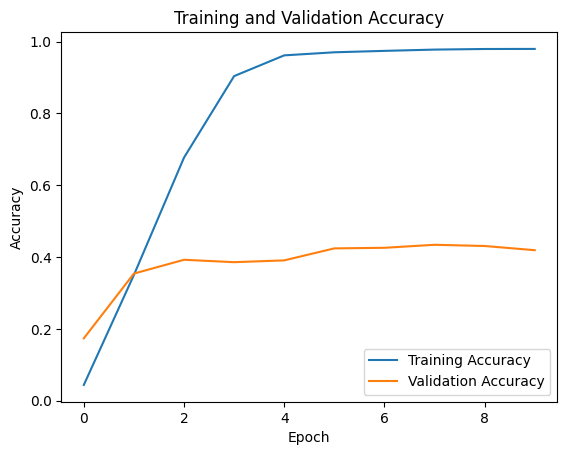

In [25]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

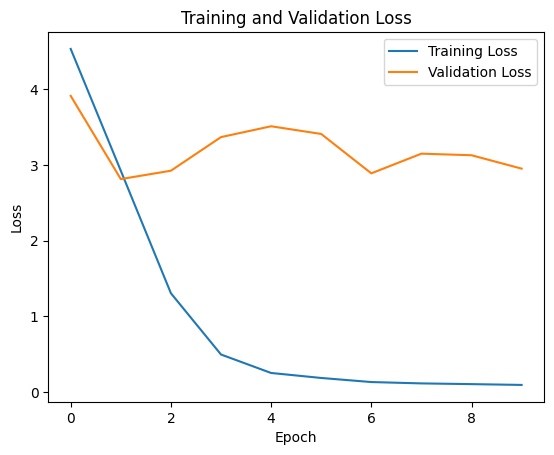

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

trying prediction on imges

In [27]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

In [28]:
loaded_model = load_model('my_model.h5')

# Load and preprocess the image you want to predict
image_path = '/kaggle/input/yoga-pose-image-classification-dataset/dataset/adho mukha vriksasana/16-0.png'  # Replace 'path_to_your_image.jpg' with the path to your image file
image = Image.open(image_path)
image = image.resize((255, 255))  # Resize the image to match the input shape of your model
image_array = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


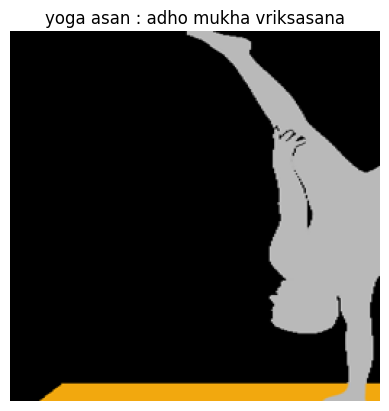

In [29]:
predictions = loaded_model.predict(image_array)
predicted_class = np.argmax(predictions)
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

# Plot the image with the predicted class name
plt.imshow(image)
plt.title(f'yoga asan : {predicted_label}')
plt.axis('off')
plt.show()

In [31]:


# Load and preprocess the image you want to predict
image_path = '/kaggle/input/yoga-pose-image-classification-dataset/dataset/ardha pincha mayurasana/13-0.png'  # Replace 'path_to_your_image.jpg' with the path to your image file
image = Image.open(image_path)
image = image.resize((255, 255))  # Resize the image to match the input shape of your model
image_array = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


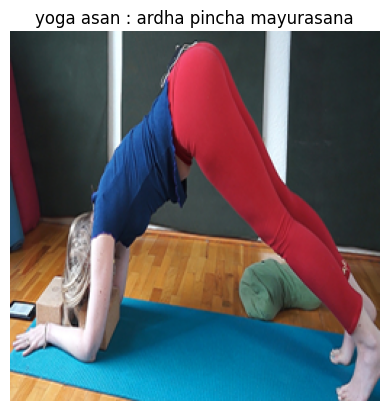

In [32]:
predictions = loaded_model.predict(image_array)
predicted_class = np.argmax(predictions)
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

# Plot the image with the predicted class name
plt.imshow(image)
plt.title(f'yoga asan : {predicted_label}')
plt.axis('off')
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model2 = Sequential()

# Add convolutional layers with relu activation and max pooling
model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:], padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model2.add(Flatten())

# Add fully connected layers with relu activation
model2.add(Dense(60, activation='relu'))
model2.add(Dense(80, activation='relu'))

# Output layer with softmax activation for multi-class classification
model2.add(Dense(120, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model2.fit(X_train_normalized, y_train_encoded, epochs=10, validation_data=(X_val_normalized, y_val_encoded))

Epoch 1/10
  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:13:18 30s/step - accuracy: 0.0000e+00 - loss: 4.7694

I0000 00:00:1712563846.719076     949 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712563846.737484     949 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.0114 - loss: 5.0206

W0000 00:00:1712563901.301599     947 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


150/150 ━━━━━━━━━━━━━━━━━━━━ 93s 424ms/step - accuracy: 0.0114 - loss: 5.0190 - val_accuracy: 0.0134 - val_loss: 4.6645
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.0263 - loss: 4.6065 - val_accuracy: 0.0417 - val_loss: 4.2899
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.0925 - loss: 4.0724 - val_accuracy: 0.1035 - val_loss: 3.9407
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.1773 - loss: 3.4087 - val_accuracy: 0.1519 - val_loss: 3.6645
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.2723 - loss: 2.8131 - val_accuracy: 0.1636 - val_loss: 3.6451
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.3763 - loss: 2.3016 - val_accuracy: 0.1853 - val_loss: 3.6553
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.5030 - loss: 1.7839 - val_accuracy: 0.1770 - val_loss: 4.0166
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.6106 - loss: 1.3682 - val

In [21]:
test_loss, test_accuracy = model2.evaluate(X_test_normalized, y_test_encoded)
print("Test accuracy:", test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 479ms/step - accuracy: 0.2305 - loss: 5.2258
Test accuracy: 0.23000000417232513


In [22]:
model2.save('my_model_vgg.h5')

In [23]:
import matplotlib.pyplot as plt

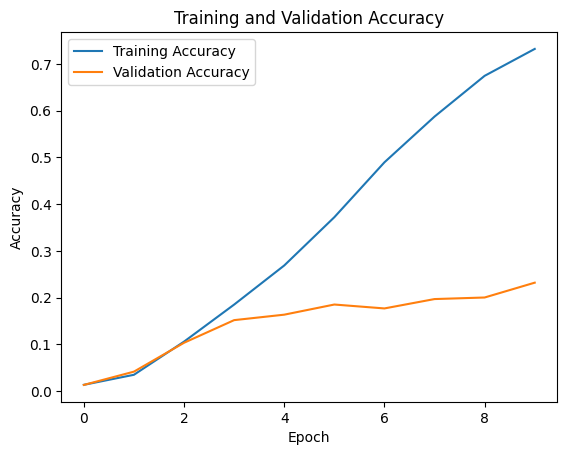

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

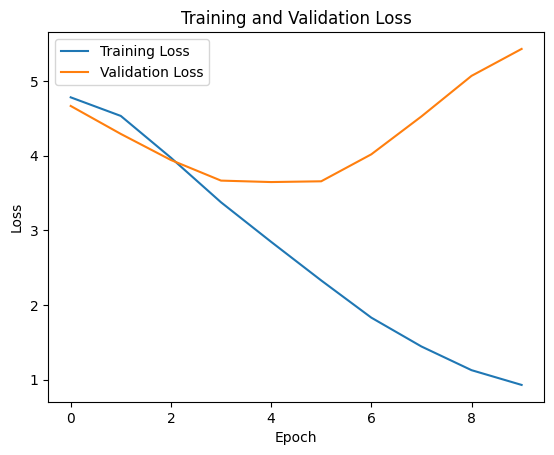

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [26]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

In [36]:
loaded_model1 = load_model('my_model_vgg.h5')

# Load and preprocess the image you want to predict
image_path = '/kaggle/input/yoga-pose-image-classification-dataset/dataset/anantasana/15-0.png'  # Replace 'path_to_your_image.jpg' with the path to your image file
image = Image.open(image_path)
image = image.resize((255, 255))  # Resize the image to match the input shape of your model
image_array = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


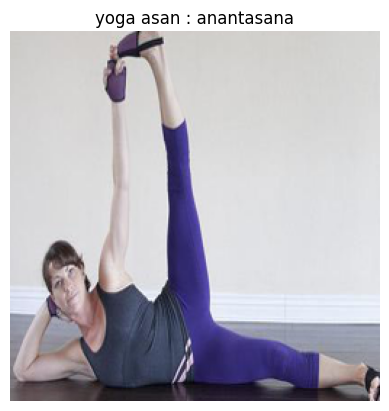

In [37]:
predictions = loaded_model1.predict(image_array)
predicted_class = np.argmax(predictions)
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

# Plot the image with the predicted class name
plt.imshow(image)
plt.title(f'yoga asan : {predicted_label}')
plt.axis('off')
plt.show()

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the AlexNet model
model_alexnet = Sequential()

# Layer 1: Convolutional layer with relu activation and max pooling
model_alexnet.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=X_train.shape[1:]))
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2: Convolutional layer with relu activation and max pooling
model_alexnet.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3: Convolutional layer with relu activation
model_alexnet.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 4: Convolutional layer with relu activation
model_alexnet.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 5: Convolutional layer with relu activation and max pooling
model_alexnet.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the output of the convolutional layers
model_alexnet.add(Flatten())

# Layer 6: Fully connected layer with relu activation and dropout
model_alexnet.add(Dense(4096, activation='relu'))
model_alexnet.add(Dropout(0.5))

# Layer 7: Fully connected layer with relu activation and dropout
model_alexnet.add(Dense(4096, activation='relu'))
model_alexnet.add(Dropout(0.5))

# Layer 8: Output layer with softmax activation for multi-class classification
model_alexnet.add(Dense(120, activation='softmax'))

# Compile the model
model_alexnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_alexnet.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 120)            │       491,640 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,772,984 (224.20 MB)

 Trainable params: 58,772,984 (224.20 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Compile the model
model_alexnet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model_alexnet.fit(X_train_normalized, y_train_encoded, epochs=10, validation_data=(X_val_normalized, y_val_encoded))

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.0124 - loss: 4.9096 - val_accuracy: 0.0134 - val_loss: 4.6534
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.0160 - loss: 4.6565 - val_accuracy: 0.0117 - val_loss: 4.6521
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.0193 - loss: 4.6588 - val_accuracy: 0.0134 - val_loss: 4.6463
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.0150 - loss: 4.6513 - val_accuracy: 0.0117 - val_loss: 4.6495
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.0130 - loss: 4.6576 - val_accuracy: 0.0134 - val_loss: 4.6500
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.0194 - loss: 4.6468 - val_accuracy: 0.0117 - val_loss: 4.6458
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.0179 - loss: 4.6482 - val_accuracy: 0.0134 - val_loss: 4.6466
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.0161 - loss: 4.6458 - val_ac

In [41]:
test_loss, test_accuracy = model2.evaluate(X_test_normalized, y_test_encoded)
print("Test accuracy:", test_accuracy)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2305 - loss: 5.2258
Test accuracy: 0.23000000417232513


In [43]:
model_alexnet.save('my_model_alexnet.h5')

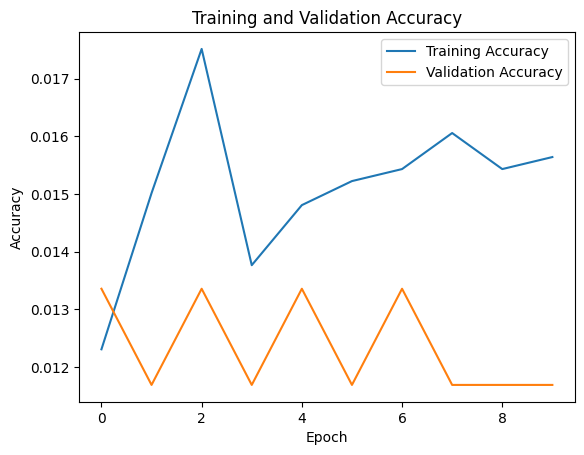

In [44]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

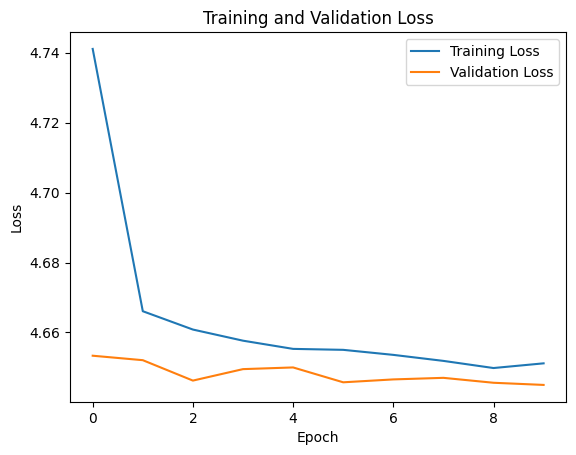

In [45]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [46]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

In [49]:
loaded_model1 = load_model('my_model_vgg.h5')

# Load and preprocess the image you want to predict
image_path = '/kaggle/input/yoga-pose-image-classification-dataset/dataset/adho mukha vriksasana/26-0.png'  # Replace 'path_to_your_image.jpg' with the path to your image file
image = Image.open(image_path)
image = image.resize((255, 255))  # Resize the image to match the input shape of your model
image_array = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


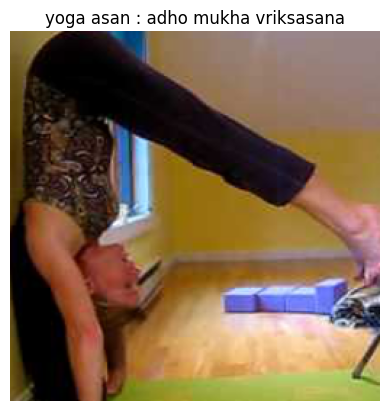

In [50]:
predictions = loaded_model1.predict(image_array)
predicted_class = np.argmax(predictions)
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

# Plot the image with the predicted class name
plt.imshow(image)
plt.title(f'yoga asan : {predicted_label}')
plt.axis('off')
plt.show()